# Himalayan Mountaineering Analysis
## CPSC 322
## Fall, 2022
### Jaymin West, Dominic MacIsaac
---------------------------------------------------------

In [137]:
import importlib

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyAssociationRuleMiner, MyRandomForrestClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import eda_utils
importlib.reload(eda_utils)

import matplotlib.pyplot as plt

### Cleaning Data:

### Data Presentation Goals:
1. Summits by peak, year, nation, agency, season
1. Relationship between ratio of hired and summit success
1. Relationship of number of camps and summit success
1. Comparision of climbs with and without oxygen (and O2SLEEP)
1. Camps by peak
1. Camps by peak by agency
1. Camps by season 


<b>Class Distribution! Just total counts summit and not summit<b>

In [138]:
himalaya_table = MyPyTable()
himalaya_table.load_from_file("data/322-Final-Dataset.csv")

# Removing all rows with missing values
himalaya_table.remove_rows_with_missing_values("")

# Converting the SMTMEMBERS row to binary values as this will be 
#   what we use for predictions
himalaya_table.convert_row_to_binary("SUMMIT_SUCCESS", 0.0)
#himalaya_table.pretty_print()
himalaya_table = himalaya_table.combine_boolean_rows("SKI", "PARAPENTE", "TRUE")

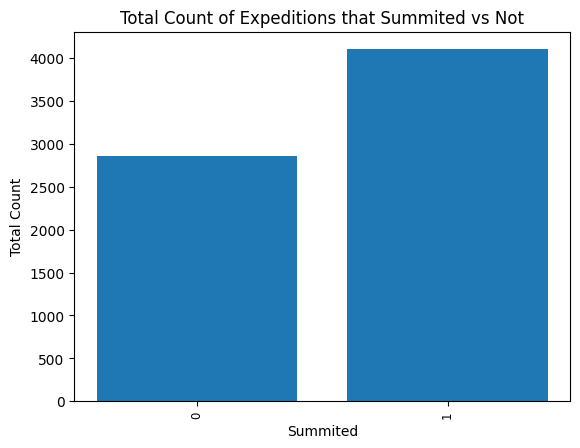

In [139]:
summit_col = eda_utils.get_column(himalaya_table.data,himalaya_table.column_names,"SUMMIT_SUCCESS")
eda_utils.generate_frequency_diagram(summit_col,"Summited", "Total Count", "Total Count of Expeditions that Summited vs Not")

### Creating the success and failure tables:

In [155]:
success_table = MyPyTable()
success_table.column_names = himalaya_table.column_names
success_table.data = [row for row in himalaya_table.data if row[-1] == 1]

failure_table = MyPyTable()
failure_table.data = [row for row in himalaya_table.data if row[-1] == 0]
failure_table.column_names = himalaya_table.column_names

## Data Analysis

In [ ]:
def make_pie_chart_from_column(table, col_name, data_labels):
    l = table.get_column(col_name)
    freq_dict = {item:0 for item in l}

    for item in l:
        freq_dict[item] += 1

    freq_dict = dict(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))

    vals = list(freq_dict.values())
    
    s = sum(vals)

    lables = ["%s - %1.1f%%"(data_labels[i], (vals[i] / s)) for i in range(len(data_labels))]
    
    plt.pie(vals, labels=labels)
    plt.show()





labels = ["Summer - %1.1f%%"%((vals[0] / s) *100), "Spring - %1.1f%%"%((vals[1] / s) *100), 
            "Autum - %1.1f%%"%((vals[2] / s) *100), "Winter - %1.1f%%"%((vals[3] / s) *100)]



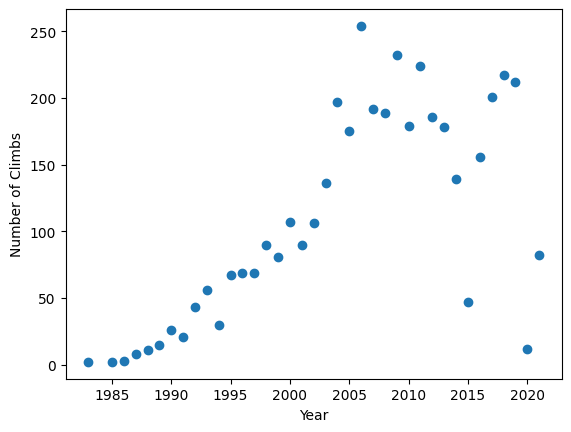

In [141]:
eda_utils.generate_scatter_plot(success_table, "YEAR", "Year", "Number of Climbs")

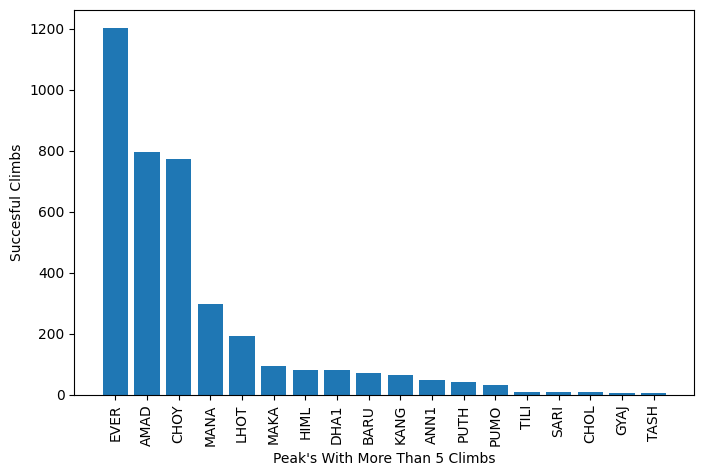

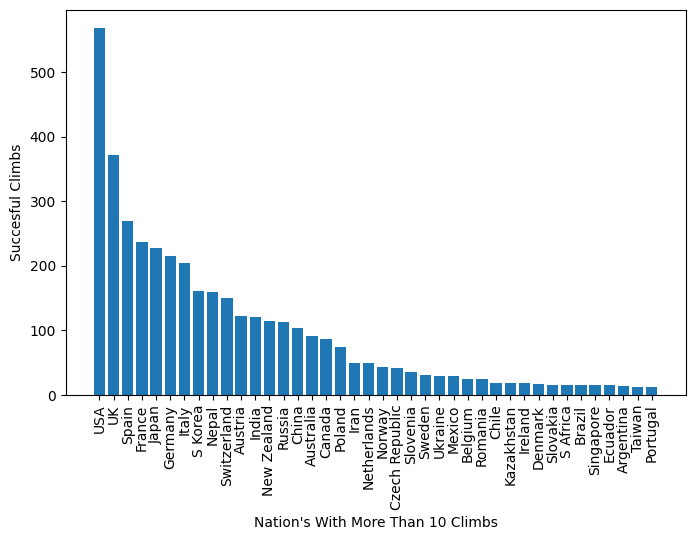

In [142]:
eda_utils.generate_freq_chart(success_table, "PEAKID", "Peak's With More Than 5 Climbs", "Succesful Climbs", 5)
eda_utils.generate_freq_chart(success_table, "NATION", "Nation's With More Than 10 Climbs", "Succesful Climbs", 10)

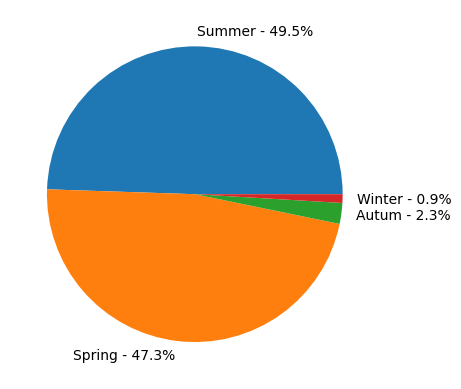

In [150]:

l = failure_table.get_column("SEASON")
freq_dict = {item:0 for item in l}

for item in l:
    freq_dict[item] += 1

freq_dict = dict(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))

vals = list(freq_dict.values())

s = sum(vals)
labels = ["Summer - %1.1f%%"%((vals[0] / s) *100), "Spring - %1.1f%%"%((vals[1] / s) *100), 
            "Autum - %1.1f%%"%((vals[2] / s) *100), "Winter - %1.1f%%"%((vals[3] / s) *100)]

plt.pie(vals, labels=labels)
plt.show()

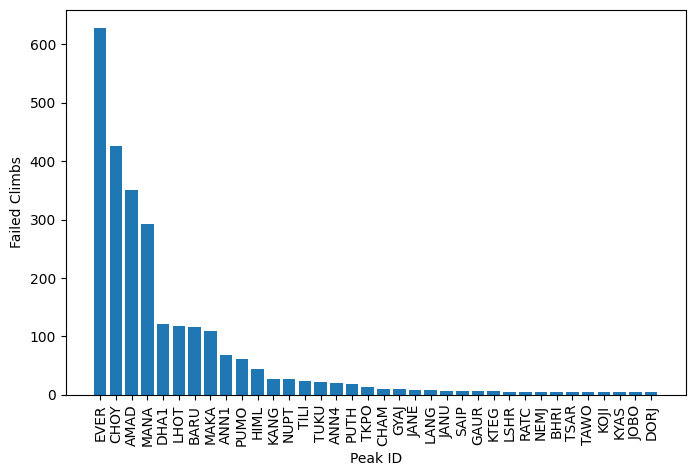

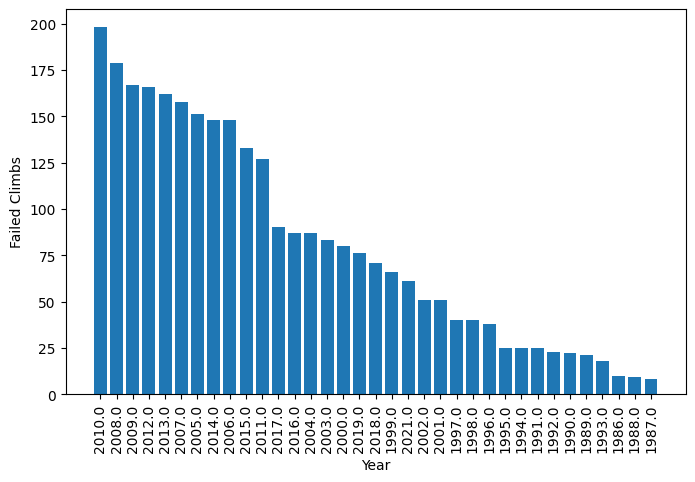

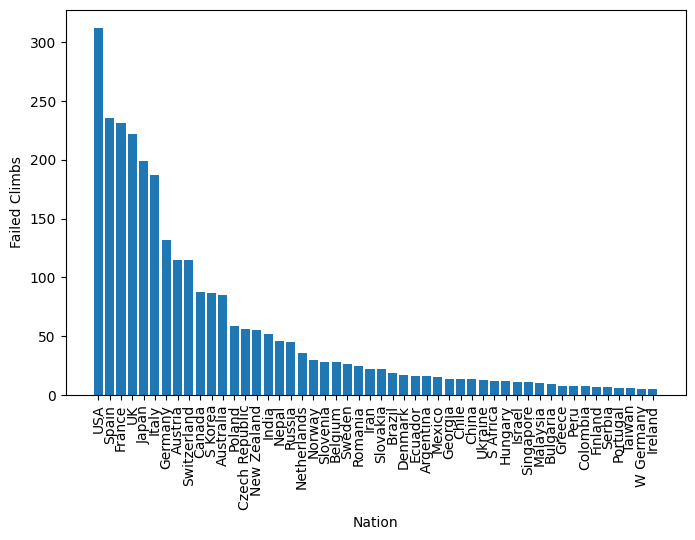

In [151]:

eda_utils.generate_freq_chart(failure_table, "PEAKID", "Peak ID", "Failed Climbs", 4)
eda_utils.generate_freq_chart(failure_table, "YEAR", "Year", "Failed Climbs", 4)
eda_utils.generate_freq_chart(failure_table, "NATION", "Nation", "Failed Climbs", 4)

## Creating Training Data (with and without attribute selection)

In [144]:
X_train = [row[:-1] for row in himalaya_table.data]
y_train = [row[-1] for row in himalaya_table.data]
# Only using YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE:
select_X_train = [[row[1], row[2], row[3], row[10], row[14]] for row in himalaya_table.data]

## Naive Bayes Classifying:

In [158]:
himalaya_nb_classifier = MyNaiveBayesClassifier()

classifier_stats = myutils.get_classifier_stats(himalaya_nb_classifier, X_train, y_train, 10)
select_classifier_stats = myutils.get_classifier_stats(himalaya_nb_classifier, select_X_train, y_train, 10)

myutils.print_stats("Naive Bayes Results %", classifier_stats)
myutils.print_stats("Naive Bayes Results %\nTrained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE ", select_classifier_stats)

Naive Bayes Results %
Accuracy:  59.599999999999994
Error Rate:  40.400000000000006
Precision:  53.6
Recall:  12.3
F1 Score:  20.0
Naive Bayes Results %
Trained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE 
Accuracy:  64.8
Error Rate:  35.199999999999996
Precision:  57.599999999999994
Recall:  54.7
F1 Score:  56.10000000000001


## Decision Tree Classifying:

In [146]:
himalaya_nb_classifier = MyDecisionTreeClassifier()

classifier_stats = myutils.get_classifier_stats(himalaya_nb_classifier, X_train, y_train, 10)
select_classifier_stats = myutils.get_classifier_stats(himalaya_nb_classifier, select_X_train, y_train, 10)

myutils.print_stats("Decision Tree Results %\nTrained on ALL attributes", classifier_stats)
myutils.print_stats("Decision Tree Results %\nTrained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE", select_classifier_stats)

Decision Tree Results %
Trained on ALL attributes
Accuracy:  16.5
Error Rate:  83.5
Precision:  49.5
Recall:  13.100000000000001
F1 Score:  20.7
Decision Tree Results %
Trained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE
Accuracy:  64.0
Error Rate:  36.0
Precision:  55.900000000000006
Recall:  63.2
F1 Score:  58.699999999999996


## Rule Mining:

In [147]:
# himalaya_table.convert_to_string()
# rules_dataset = himalaya_table.data

# X = [rules_dataset[row] for row in range(len(rules_dataset))]
# for row in range(len(X)):
#     for col in range(len(himalaya_table.column_names)):
#         X[row][col] = himalaya_table.column_names[col] + "=" + X[row][col]

# himalaya_arm = MyAssociationRuleMiner()
# himalaya_arm.fit(rules_dataset)
# himalaya_arm.print_association_rules()


## Random Forest Classification:

In [160]:
X_test = himalaya_table.data[100:200]

himalaya_rf = MyRandomForrestClassifier()

classifier_stats = myutils.get_classifier_stats(himalaya_rf, X_train, y_train, 10)
select_classifier_stats = myutils.get_classifier_stats(himalaya_rf, select_X_train, y_train, 10)

myutils.print_stats("Random Forest Classifier Results %\nTrained on ALL attributes", classifier_stats)
myutils.print_stats("Random Forest Classifier Results %\nTrained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE", select_classifier_stats)

Random Forrest Classifier Results %
Trained on ALL attributes
Accuracy:  55.2
Error Rate:  44.800000000000004
Precision:  63.1
Recall:  37.5
F1 Score:  45.0
Random Forrest Classifier Results %
Trained on YEAR, SEASON, HOST, 02CLIMB, COMMERCIALROUTE
Accuracy:  64.1
Error Rate:  35.9
Precision:  55.400000000000006
Recall:  69.5
F1 Score:  60.8
